In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# periods=개수, freq=주기 지정(D:Day)
date_list = pd.date_range('2020-07-01', periods=100, freq='D')
print(date_list)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
      

In [3]:
for today in date_list:
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=' + (today.strftime('%Y%m%d'))
    print(url)

https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200701
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200702
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200703
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200704
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200705
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200706
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200707
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200708
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200709
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200710
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200711
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200712
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20200713
https://movie.naver.com/movie/sdb/rank

In [4]:
%%time

from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

date_list = pd.date_range('2020-07-01', periods=100, freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=' + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), 'html.parser')
    
    titles = soup.find_all('div', {'class': 'tit5'})
    points = soup.find_all('td', {'class': 'point'})
    
    titles_text = []
    points_text = []
    date = []
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date
    
# print(movie_title[:5])
# print(movie_point[:5])
# print(movie_date)

print(movie_point)



  0%|          | 0/100 [00:00<?, ?it/s]

[9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.41, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9

In [5]:
import pandas as pd

frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


In [6]:
expr = "title == ['토이 스토리 3']"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


In [7]:
expr = "title == ['토이 스토리 3', '그린 북']"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
0    2020-07-01      그린 북   9.59
28   2020-07-01  토이 스토리 3   9.38
50   2020-07-02      그린 북   9.59
77   2020-07-02  토이 스토리 3   9.38
100  2020-07-03      그린 북   9.59
...         ...       ...    ...
4881 2020-10-06  토이 스토리 3   9.39
4900 2020-10-07      그린 북   9.59
4931 2020-10-07  토이 스토리 3   9.39
4950 2020-10-08      그린 북   9.59
4981 2020-10-08  토이 스토리 3   9.39

[200 rows x 3 columns]


In [8]:
expr = "title == ['토이 스토리 3']"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


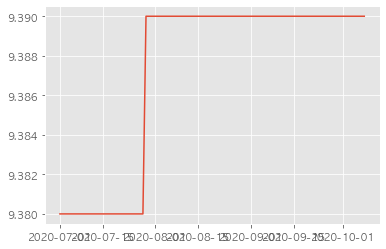

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.plot(search_movie['date'], search_movie['point'])
plt.show()

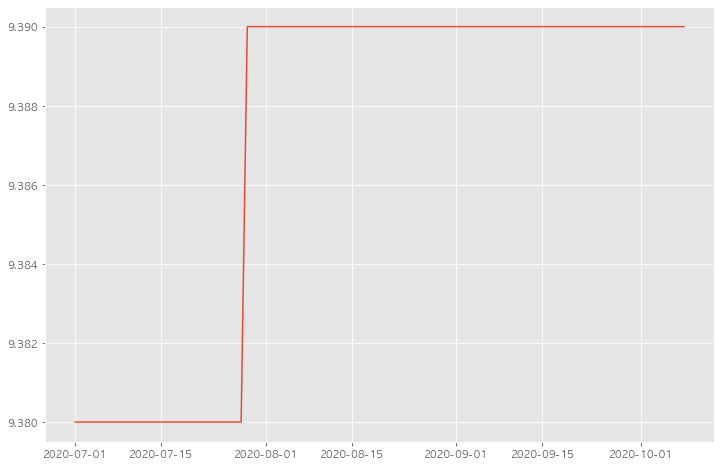

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()

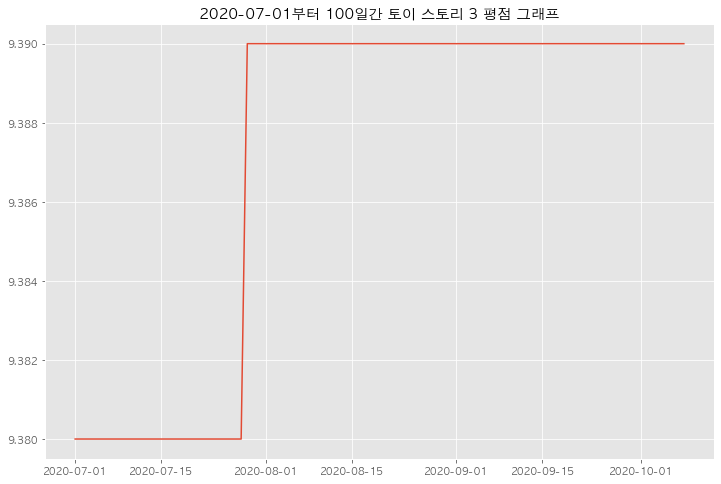

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 토이 스토리 3 평점 그래프')
plt.plot(search_movie['date'], search_movie['point'])
plt.show()

In [12]:
!pip install pandas==1.5

먼 훗날 우리


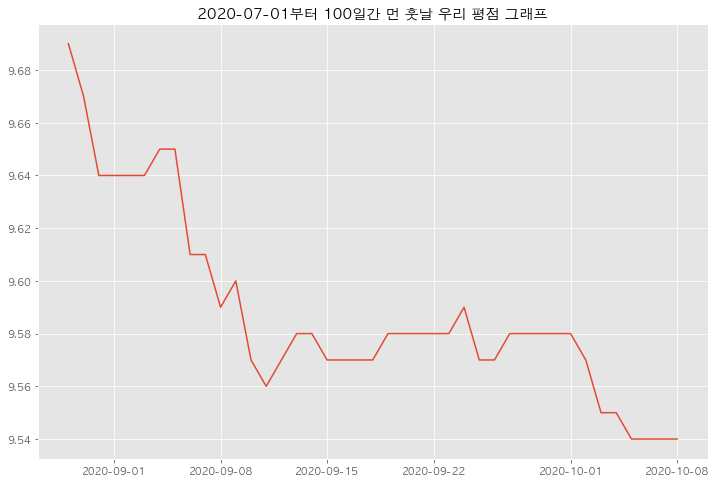

In [18]:
import matplotlib.pyplot as plt

input_title = input()
search_movie = frame.query("title == ['{}']".format(input_title))

# print(search_movie)

plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# figsize=(width, height). it uses inch.
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.show()